In [1]:
import sys
import os
#import random forrest from sklearn 
from sklearn.ensemble import RandomForestClassifier


sys.path.append(os.path.abspath('../../src'))

# add functions explicitly to the path
from utils import *
from data_cleaning import *
from pipeline import *
from feature import FeatureEngineering

from sklearn.metrics import f1_score

# load data and clean 

In [2]:
df_X, df_y = load_data_train()
df_X = convert_to_object(df_X)
df_X['geo_level_1_id'] = df_X['geo_level_1_id'].astype('object')
df_X['geo_level_2_id'] = df_X['geo_level_2_id'].astype('object')
df_X['geo_level_3_id'] = df_X['geo_level_3_id'].astype('object')

df_X, df_y = drop_duplicates(df_X,df_y)

outliers_ids = get_outliers_ids(df_X)

df_X, df_y = drop_row(outliers_ids.tolist(), df_X, df_y)

tot number of outliers: 10526
- count_floors_pre_eq - number of outliers: 2439
- age - number of outliers: 1259
- area_percentage - number of outliers: 3811
- height_percentage - number of outliers: 2407
- count_families - number of outliers: 2325


In [3]:
# Feature Engineering 

In [4]:

feature_engineering = FeatureEngineering()

# Scenario 1: All Features (Original Features)
df_scenario1, num_features1, cat_features1 = feature_engineering.transform(df_X, scenario=1)

# Scenario 2: All Features + New Features
df_scenario2, num_features2, cat_features2 = feature_engineering.transform(df_X, scenario=2)

# Scenario 3: All Features + New Features - has_flags
df_scenario3, num_features3, cat_features3 = feature_engineering.transform(df_X, scenario=3)

# Scenario 4: All Features - has_flags
df_scenario4, num_features4, cat_features4 = feature_engineering.transform(df_X, scenario=4)

In [5]:
# Experiment : 

# with different types of features : 

# 1. all features (all old features )
# 2. all features + new build Features 
# 3. all features + new build Features - has_flags 
# 4 . all features - has_flags



In [6]:

# 1. all features (all old features ) 0.7201188618338072
# 2. all features + new build Features  0.7247151377813883
# 3. all features + new build Features - has_flags  0.7247151377813883
# 4 . all features - has_flags 0.7201188618338072


# so the new features does make a difference , now its best to test encoding methods . with new features , withouth has flags which is scenario 3. 




In [7]:
print_confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

# Encoding 

In [3]:
feature_engineering = FeatureEngineering()


# Scenario 3: All Features + New Features - has_flags
df_scenario3, num_features3, cat_features3 = feature_engineering.transform(df_X, scenario=3)


In [4]:
unique_counts = df_scenario3[cat_features3].nunique().sort_values(ascending=False)

# Print results
print(unique_counts)

geo_level_3_id            11568
geo_level_2_id             1413
geo_level_1_id               31
plan_configuration           10
foundation_type               5
ground_floor_type             5
other_floor_type              4
building_material             4
type_of_building              4
position                      4
legal_ownership_status        4
roof_type                     3
land_surface_condition        3
sticking_material             2
is_concrete                   2
dtype: int64


In [51]:
num_features3

['count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families']

In [5]:

# encoding 
standard_scaler_cols=num_features3
robust_scaler_cols=[]
baseN_enc_cols=['geo_level_1_id']
one_hot_cols=['plan_configuration', 'foundation_type','ground_floor_type',"other_floor_type",'building_material','type_of_building',
                'position','legal_ownership_status','roof_type','land_surface_condition']
frequency_enc_cols=['geo_level_3_id', 'geo_level_2_id']
target_enc_cols=[]
binary_enc_cols=['is_concrete','sticking_material']

In [6]:
df_y = df_y.drop(['building_id'], axis=1)
df_X = df_X.drop(['building_id'], axis=1)

In [45]:
type(y_train)

pandas.core.frame.DataFrame

In [9]:



X_train, X_test, y_train, y_test = train_test_split(df_scenario3, df_y, test_size=0.2, random_state=42, stratify=df_y)



model = RandomForestClassifier(n_estimators=100, random_state=0)

pre_proccessor = pipeline_preprocessor(X_train, y= y_train.squeeze(),
                                standard_scaler_cols=standard_scaler_cols,
                                       baseN_enc_cols=baseN_enc_cols,
                                       one_hot_cols = one_hot_cols,
                                       frequency_enc_cols= frequency_enc_cols,
                                       binary_enc_cols=binary_enc_cols)

pipeline = classifier_pipeline(pre_proccessor, model)


In [13]:
for col_group in [standard_scaler_cols, robust_scaler_cols, baseN_enc_cols, one_hot_cols, 
                  frequency_enc_cols, target_enc_cols, binary_enc_cols]:
    if any(isinstance(col, list) for col in col_group):
        print(f"❌ Error: Nested list found in {col_group}")

In [10]:
model_fit = model_training(X_train, y_train, pipeline)

ValueError: The output of the 'frequency_encoder' transformer should be 2D (numpy array, scipy sparse array, dataframe).

In [ ]:

model_fit = model_training(X_train,y_train,pipeline)
models.append(model_fit)

y_pred = model_fit.predict(X_test)
score = f1_score(y_test, y_pred, average='micro')
print (scenario)
print(score)
print_confusion_matrix(y_test, y_pred)

In [ ]:
numerical_feature = df_X.select_dtypes(include=['number']).columns.tolist()
categorical_feature = df_X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df_y = df_y.drop(['building_id'], axis=1)
df_X = df_X.drop(['building_id'], axis=1)

models= []

for scenario in [1,2,3,4]:
    
    df_FE, num_features, cat_features = feature_engineering.transform(df_X, scenario=scenario)

    





    # encoding 
    standard_scaler_cols = num_features
    robust_scaler_cols = []
    baseN_enc_cols = cat_features
    ordinal_enc_cols = []
    one_hot_cols = []


    X_train, X_test, y_train, y_test = train_test_split(df_FE, df_y, test_size=0.2, random_state=42, stratify=df_y)

    print("training")

    model = RandomForestClassifier(n_estimators=100, random_state=0)

    pre_proccessor = pipeline_preprocessor(standard_scaler_cols=standard_scaler_cols,baseN_enc_cols=baseN_enc_cols)
    pipeline = classifier_pipeline(pre_proccessor, model)

    model_fit = model_training(X_train,y_train,pipeline)
    models.append(model_fit)

    y_pred = model_fit.predict(X_test)
    score = f1_score(y_test, y_pred, average='micro')
    print (scenario)
    print(score)
    print_confusion_matrix(y_test, y_pred)




In [36]:
# test the model
df_test = load_data_test()
df_test = convert_to_object(df_test)
df_test_id = df_test.pop('building_id')

In [37]:
test_predictions = model_fit.predict(df_test)
df_submission = pd.DataFrame({'building_id': df_test_id, 'damage_grade': test_predictions})

In [20]:
df_submission

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2


In [28]:
df_submission.to_csv('../../results/20250129_16_24_submission.csv', index=False)

In [19]:
feature_names = pipeline.named_steps['preprocessing'].get_feature_names_out()


In [20]:
# Feature importance 

feature_importances=model.feature_importances_

In [21]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


                                           Feature  Importance
1                             standard_scaler__age    0.118890
2                 standard_scaler__area_percentage    0.103703
3               standard_scaler__height_percentage    0.047512
8                  baseN_encoder__geo_level_1_id_3    0.030344
7                  baseN_encoder__geo_level_1_id_2    0.025767
..                                             ...         ...
95  baseN_encoder__has_secondary_use_health_post_1    0.000019
94  baseN_encoder__has_secondary_use_health_post_0    0.000018
97   baseN_encoder__has_secondary_use_gov_office_1    0.000013
98   baseN_encoder__has_secondary_use_use_police_0    0.000012
99   baseN_encoder__has_secondary_use_use_police_1    0.000007

[112 rows x 2 columns]


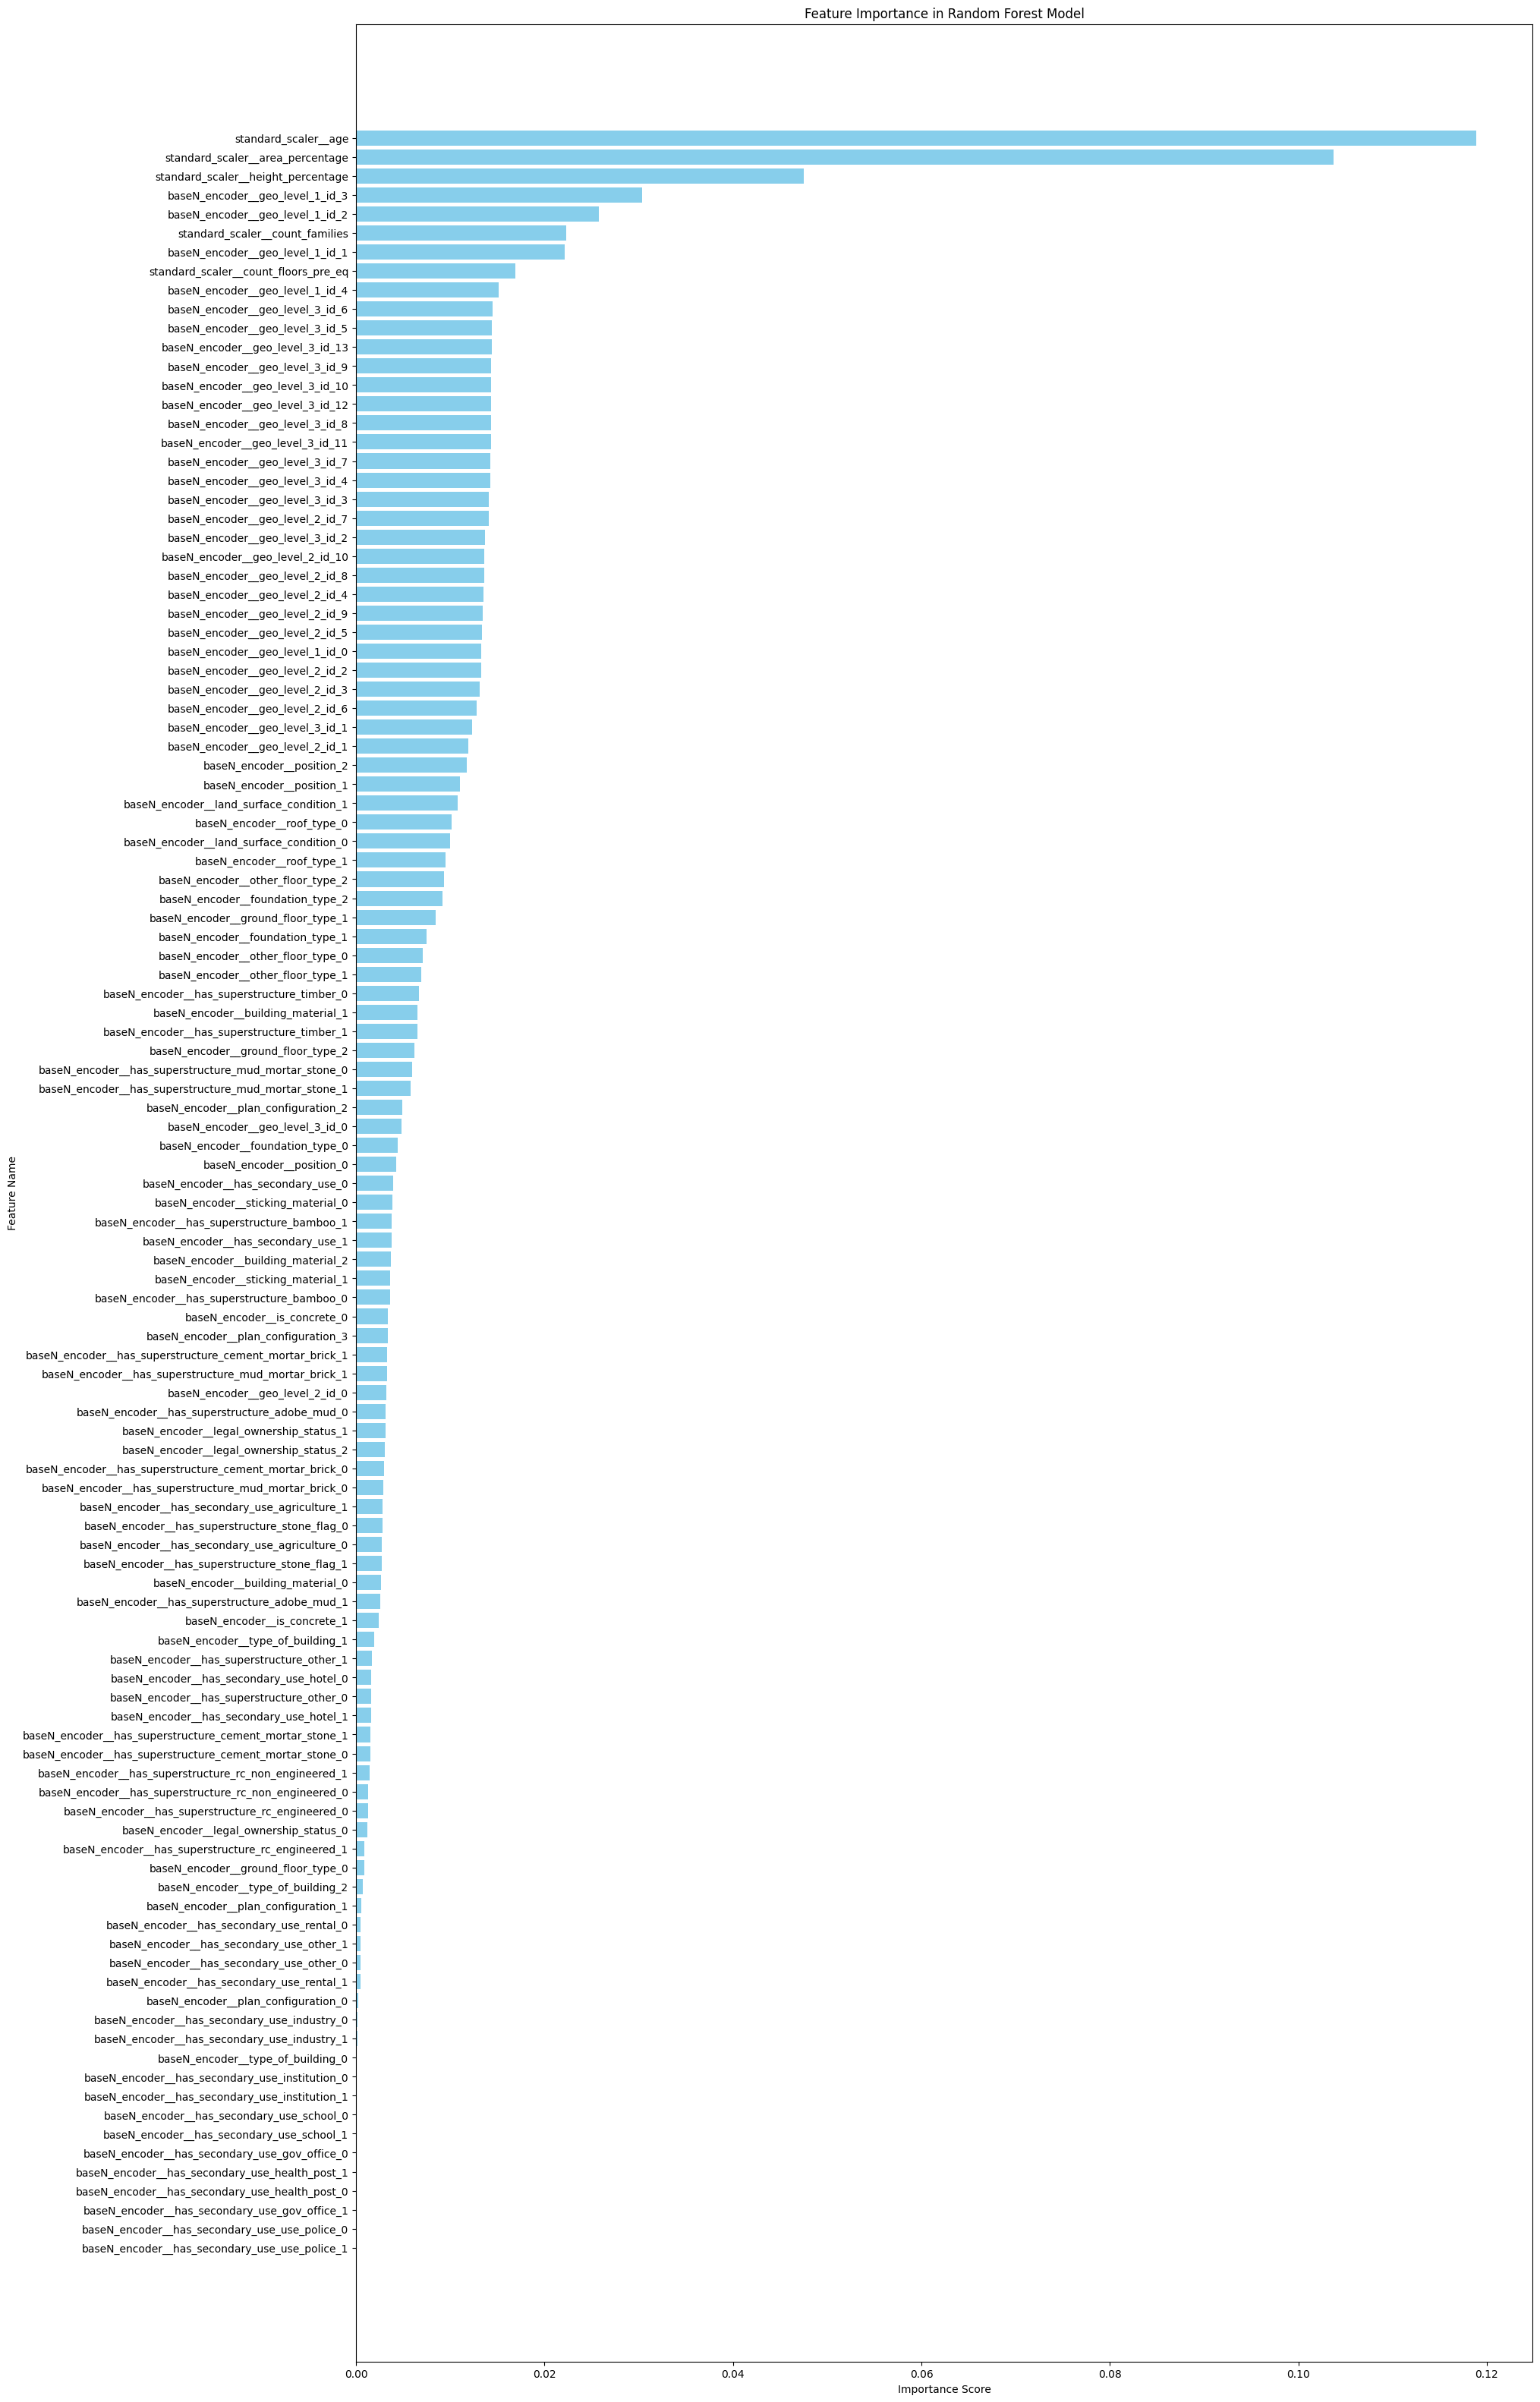

In [27]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print(importance_df)

# Plot feature importance
plt.figure(figsize=(20, 40))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [25]:
importance_df.sort_values

<bound method DataFrame.sort_values of                                            Feature  Importance
1                             standard_scaler__age    0.118890
2                 standard_scaler__area_percentage    0.103703
3               standard_scaler__height_percentage    0.047512
8                  baseN_encoder__geo_level_1_id_3    0.030344
7                  baseN_encoder__geo_level_1_id_2    0.025767
..                                             ...         ...
95  baseN_encoder__has_secondary_use_health_post_1    0.000019
94  baseN_encoder__has_secondary_use_health_post_0    0.000018
97   baseN_encoder__has_secondary_use_gov_office_1    0.000013
98   baseN_encoder__has_secondary_use_use_police_0    0.000012
99   baseN_encoder__has_secondary_use_use_police_1    0.000007

[112 rows x 2 columns]>